# Heart Disease Detection Model Proposal

## Introduction:

Heart disease is the second leading cause of death in Canada affecting over 1.2 million citizens (Canada 2022). Since heart disease affects more than 12% of the population and its obvious health consequences, a lot of research has been directed in the treatment and prevention of heart disease (Canada 2022). Although this has had great effects in decreasing the overall prevalence of heart disease in Canada since the early 2000s, there is still a major need to accurately detect the presence of heart disease in the population. What observable cues can be used as predictors for the detection of heart disease? And how can they be used to accurately detect the presence of heart disease. 

The purpose of this project is to explore how a patient's levels of different measured attributes can predict the presence of heart disease. In addition, we want to build a highly accurate heart disease classification model from these attributes. Since this is a diagnosis classifier, one of our main objectives is to minimize the amount of false negative diagnoses the classifier would predict. This means that when our classifier says that the patient doesn’t have any heart disease, it is very accurate. This is important because the risks associated with having heart disease are very high, and therefore we don’t want our classifier to tell patients they don’t have heart disease when they actually do. 

In order to build this classifier, we will be using data from the heart disease dataset on UC Irvine’s Machine learning repository called `cleveland.processed.data`. This dataset consists of 14 features from an original set of 76 attributes from 303 consecutive patients referred for coronary angiography at the Cleveland Clinic between May 1981 and September 1984 (Detrano et al., 1989). For this type of analysis, we will be building a classification model using the k-nearest neighbors classifier, which has been commonly used in the medical field as a simple but accurate classifier (Tayeb et al., 2017; Parry et al., 2010) . In this approach, our new data point (patient) will be compared to all other data points we have in our dataset and to find the closest data points to our new one. The classification is determined by the average classification of the closest neighbors. As such, our analysis process will start by determining which attributes to use, then building the classification model using our training data and test it on the remaining data. We will also use the training data to adjust our model and determine the K with the highest accuracy. 


## Method: 
Initially, according to our proposal, we built two different models, the first without having balanced data and the next having balanced data, based on 4 quantitative variables selected from the original 14 columns of our dataset. These 4 were chosen because of their quantitative nature and scientific collecting methods. The four predictor variables chosen were: 
1. `trestbps`: resting blood pressure (unit: mm Hg)
2. `chol`: serum cholesterol (unit: Milligrams per deciliter(mg/dl))
3. `thalach`: maximum heart rate achieved 
4. `oldpeak`: ST depression induced by exercise relative to rest (usually mm, measured on electrocardiogram (ECG or EKG)).

As for our response variable, we used the presence of heart disease(num). It takes 5 levels based on angiographic disease status where level 0 describes healthy patients and levels 1-4 describes patients diagnosed with increasing stages of heart disease.
However, these models are not suitable for clinical use as the recalls were too low, with 50.0% for the unbalanced model and 55.6% for the balanced model. The following method section will be based on the best model we trained with 13 predictor variables that were chosen by the original study among 76 collected variables. These included the following variables:
1. `age`: Age of the patient (years)
1. `sex`: Sex of the patient (Categorical with 2 levels- Male, Female)
1. `cp`: Chest pain type (Categorical with 4 levels-Type 1, Type 2, Type 3 and Type 4) Type 1: typical angina, Type 2: atypical angina, Type 3: non-anginal pain, Type 4: asymptomatic
1. `trestbps`: resting blood pressure (unit: mm Hg)
1. `chol`: serum cholesterol (unit: Milligrams per deciliter(mg/dl))
1. `fbs`: Fasting blood sugar > 120 mg/dl (Categorical with 2 levels-True,False)
1. `restecg`: Resting electrocardiographic results (Categorical with 3 levels-N(Normal), L1(Level 1), L2(Level 2))
1. `thalach`: Maximum heart rate achieved 
1. `exang`: Exercise induced angina (Categorical with 2 levels-Yes, No)
1. `oldpeak`: ST depression induced by exercise relative to rest (usually mm, measured on electrocardiogram (ECG or EKG)).
1. `slope`: The slope of the peak exercise ST segment (categorical with 3 levels-Up, Flat, Down)
1. `ca`: Number of major vessels (0-3) colored by flourosopy (Categorical with 4 levels-0, 1, 2, 3)
1. `thal`: The heart status as retrieved from Thallium test (Categorical with 3 levels-N(normal),FD(fixed defect), RD(reversible defect)

For our model training, we will use 75% of the entire dataset as a training set to train our classifier. We will ensure that our predictors are standardized, and the diagnosis presence (0-4) is balanced. Using a parameter grid with a range of k neighbor values, we will tune our model with $k$-fold cross validation. After fitting our predictors and target columns we will plot the $k$ value (x-axis) against the mean validation score (y-axis) to determine the $k$-value that gives us the highest accuracy. Finally, we will evaluate our model on the test set, by comparing the true diagnosis on the test set with our predictions to calculate accuracy. 

As a part of tuning the classifier and to visualize the result of whether or not our model has good accuracy, we will use a line plot to show the relationship between a range of K neighbours and accuracy estimates from the test datasets. 

### Expected Results:
We anticipate finding a relationship between our 4 predictor variables and the presence or absence of heart disease. This classifier could have major impacts on the early detection of heart disease, allowing for earlier treatment and better prevention, potentially saving lives. In addition, this project could provide a basis for further research in the development of more accurate classifying models of heart disease, e.g. by further investigation into relevant predictor variables.


### Dependencies
We first start off by loading dependencies below:

In [20]:
!pip install pandas==1.5.3
!pip install scikit-learn==1.2.0
!pip install altair==4.2.2
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/92/1a/cd3e0c90d1a763ad90073e13b189b4702f11becf4e71dbbad70a7a149811/matplotlib-3.8.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e2/83/29a63bbc72839cc6b24b5a0e3d004d4ed4e8439f26460ad9a34e39251904/contourpy-1.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae

In [27]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import set_config
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.utils import resample
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Simplify working with large datasets in Altair
alt.data_transformers.disable_max_rows()

# Output dataframes instead of arrays
set_config(transform_output="pandas")

In [3]:
np.random.seed(seed=330)

### Loading dataset

Utilizing `pd.read_csv()` we can read in the dataset from  as detailed below. We will also isolate our predictors and target. We can also split it into a training and testing set.

In [4]:
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heart_disease_presence']
url = 'https://github.com/CCWebb14/DSCI100_Group_Project/blob/main/data/processed.cleveland.data?raw=true'

cleveland = pd.read_csv(url, names=col_names)

cleveland

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


###  Dataset preprocessing

The data was already processed into 14 columns in total with 13 selected variables used for establishing a probability model in Detrano et al.’s study (1984). During the preprocessing of the dataset, rows with empty values were dropped, and levels of 1 to 4 indicated positive heart disease in the column heart_disease_presence were converted to 1 and the absence of heart disease remained as 0. The preprocessed dataset consisted of 297 observations with 14 columns.

In [5]:
def replace_values_greater_than_1(value):
    if value > 1:
        return 1
    else:
        return value

cleveland['heart_disease_presence'] = cleveland['heart_disease_presence'].apply(replace_values_greater_than_1)
cleveland

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [6]:
cleveland = cleveland[~cleveland.isin(['?']).any(axis=1)]

Then, we randomly split the dataset into a 75% training set (222 observations) and a 25% testing set (75 observations). 

In [7]:
cleveland_train, cleveland_test = train_test_split(cleveland, test_size=0.25)
cleveland_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence
10,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0
215,56.0,1.0,1.0,120.0,193.0,0.0,2.0,162.0,0.0,1.9,2.0,0.0,7.0,0
117,35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.0,3.0,0
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,1
20,64.0,1.0,1.0,110.0,211.0,0.0,2.0,144.0,1.0,1.8,2.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
229,66.0,1.0,4.0,112.0,212.0,0.0,2.0,132.0,1.0,0.1,1.0,1.0,3.0,1
207,50.0,1.0,4.0,144.0,200.0,0.0,2.0,126.0,1.0,0.9,2.0,0.0,7.0,1
259,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1


To build a classifier using K-nearest neighbours, it was essential to scale all the predictors, so standardizing the predictors is performed through preprocessing using the `StandardScaler()` function in the `scikit-learn` package.

In [8]:
cleveland_preprocessor = make_column_transformer(
    (StandardScaler(), ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']),
    remainder = 'passthrough',
    verbose_feature_names_out=False
)

cleveland_train_scaled = cleveland_preprocessor.fit_transform(cleveland_train)
cleveland_test_scaled = cleveland_preprocessor.fit_transform(cleveland_test)

#### Disease Presence Counts

The training set and testing set were transformed separately to prevent data leakage. The training set consisted of 119 observations of no presence of heart disease and 103 observations of positive presence of heart disease.

In [9]:
disease_presence_counts = pd.DataFrame(cleveland_train_scaled['heart_disease_presence'].value_counts()).reset_index().rename(
    columns={'index': 'heart_disease_presence', 'heart_disease_presence':'count'})

disease_presence_counts

,heart_disease_presence,count
0,0,119
1,1,103


This training dataset was balanced using the `resample()` method, so both the negative and positive presence of heart diseases have 119 observations.  

In [10]:
positive_heart_disease = cleveland_train_scaled[cleveland_train_scaled['heart_disease_presence'] == 1]
negative_heart_disease = cleveland_train_scaled[cleveland_train_scaled['heart_disease_presence'] == 0]

positive_heart_disease_upsample = resample(
    positive_heart_disease, n_samples=negative_heart_disease.shape[0]
)
upsampled_positive_heart_disease = pd.concat((positive_heart_disease_upsample, negative_heart_disease))
upsampled_positive_heart_disease['heart_disease_presence'].value_counts()

1    119
0    119
Name: heart_disease_presence, dtype: int64

In [11]:
X_train = upsampled_positive_heart_disease.drop(columns = {'heart_disease_presence'})
y_train = upsampled_positive_heart_disease['heart_disease_presence']

Using a parameter grid with a range of 0 to 30 (exclusive) K-neighbours, we tuned our model with 10-fold cross-validation. `GridSearchCV()` method was used for tuning and scoring and was based on recall for clinical reasons to place focus on low false negatives. Then, a line graph (Figure 1) was generated after fitting the tuned grid, to show the accuracies across all numbers of neighbours in the range of 0 to 30. 


In [12]:
param_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 40, 1),
}
cleveland_tune_pipe = make_pipeline(cleveland_preprocessor, KNeighborsClassifier())

In [13]:
knn_tune_grid = GridSearchCV(
    cleveland_tune_pipe, param_grid, cv=10
)

In [14]:
knn_model_grid = knn_tune_grid.fit(X_train, y_train)

accuracies_grid = pd.DataFrame(knn_model_grid.cv_results_) 
accuracies_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019439,0.003902,0.019239,0.004747,1,{'kneighborsclassifier__n_neighbors': 1},0.875000,0.833333,0.875000,0.875000,0.958333,0.791667,0.916667,0.833333,0.913043,0.869565,0.874094,0.045350,4
1,0.017315,0.000872,0.017689,0.001303,2,{'kneighborsclassifier__n_neighbors': 2},0.875000,0.875000,0.833333,0.833333,0.875000,0.791667,0.875000,0.875000,0.913043,0.869565,0.861594,0.031775,9
2,0.018192,0.001167,0.017735,0.001069,3,{'kneighborsclassifier__n_neighbors': 3},0.791667,0.875000,0.833333,0.833333,0.916667,0.791667,0.916667,0.875000,0.826087,0.869565,0.852899,0.042861,13
3,0.016889,0.001466,0.017517,0.001227,4,{'kneighborsclassifier__n_neighbors': 4},0.833333,0.875000,0.833333,0.791667,0.958333,0.833333,0.875000,0.875000,0.913043,0.913043,0.870109,0.046640,6
4,0.016983,0.001473,0.017247,0.001336,5,{'kneighborsclassifier__n_neighbors': 5},0.791667,0.916667,0.833333,0.791667,0.916667,0.833333,0.875000,0.833333,0.913043,0.913043,0.861775,0.048698,8
5,0.017995,0.000912,0.018120,0.002612,6,{'kneighborsclassifier__n_neighbors': 6},0.791667,0.916667,0.750000,0.750000,0.958333,0.791667,0.833333,0.875000,0.869565,0.913043,0.844928,0.069274,19
6,0.017273,0.001343,0.018292,0.001135,7,{'kneighborsclassifier__n_neighbors': 7},0.666667,0.916667,0.791667,0.708333,0.958333,0.791667,0.791667,0.875000,0.956522,0.869565,0.832609,0.094551,29
7,0.017302,0.001123,0.017720,0.000868,8,{'kneighborsclassifier__n_neighbors': 8},0.791667,0.916667,0.708333,0.708333,0.958333,0.875000,0.791667,0.833333,0.956522,0.913043,0.845290,0.088954,16
8,0.017651,0.000860,0.017746,0.001179,9,{'kneighborsclassifier__n_neighbors': 9},0.708333,0.916667,0.708333,0.750000,0.958333,0.833333,0.833333,0.833333,0.956522,0.913043,0.841123,0.090380,22
9,0.018070,0.001152,0.018345,0.000952,10,{'kneighborsclassifier__n_neighbors': 10},0.750000,0.916667,0.708333,0.750000,0.958333,0.875000,0.833333,0.875000,0.913043,0.913043,0.849275,0.081069,15


In [25]:
accuracy_versus_k_grid = (
    alt.Chart(accuracies_grid)
    .mark_line(point=True)
    .properties(title='Figure 1: Mean Test Score against K (Number of Neighbors)')
    .encode(
        x = alt.X('param_kneighborsclassifier__n_neighbors', title='Number of Neighbors', scale=alt.Scale(zero=False)),
        y = alt.Y('mean_test_score', title='Mean Test Score', scale=alt.Scale(zero=False))
    )
)
 
accuracy_versus_k_grid

alt.Chart(...)

#### Selecting $K$
A `n_neighbours` of 19 with the highest accuracy was chosen. 

In [16]:
knn_spec = KNeighborsClassifier(n_neighbors=19)
cleveland_fit = make_pipeline(cleveland_preprocessor, knn_spec).fit(X_train, y_train)

In [17]:
cleveland_test_predictions = cleveland_test_scaled.assign(
    predicted = cleveland_fit.predict(cleveland_test_scaled)
)
cleveland_test_predictions

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease_presence,predicted
22,0.213487,0.771845,-0.949499,-0.824686,0.894102,-0.520756,0.980241,0.422524,-0.665062,0.631275,0.613559,-0.833663,-0.880854,1,0
53,-1.301117,0.771845,-0.949499,-0.242829,-0.495805,-0.520756,0.980241,1.618346,-0.665062,-0.877081,-0.973232,-0.833663,-0.880854,0,0
30,1.403533,-1.295597,-1.911828,0.339029,-0.068141,-0.520756,-1.033953,0.038152,-0.665062,0.631275,-0.973232,1.216328,-0.880854,0,0
274,0.321673,0.771845,-1.911828,-0.010086,-0.816553,-0.520756,-1.033953,0.507940,-0.665062,-0.206701,-0.973232,1.216328,-0.880854,1,0
1,1.187161,0.771845,0.975161,1.502745,0.936869,-0.520756,0.980241,-1.798289,1.503619,0.379882,0.613559,2.241324,-0.880854,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.213487,0.771845,0.975161,0.688144,-0.517188,-0.520756,-1.033953,-1.926413,-0.665062,0.798870,0.613559,0.191333,1.183648,1,1
63,-0.219257,-1.295597,0.012831,0.048100,1.321766,1.920286,-1.033953,0.849603,-0.665062,-0.877081,-0.973232,-0.833663,-0.880854,0,0
187,1.078975,0.771845,-0.949499,1.502745,0.081541,-0.520756,-1.033953,-1.285794,1.503619,-0.877081,0.613559,2.241324,0.667522,1,1
102,0.105301,-1.295597,0.975161,-0.359200,1.300383,-0.520756,0.980241,0.379816,-0.665062,-0.877081,-0.973232,0.191333,-0.880854,0,0


### Determining Accuracy

With the selected `n_neighbours`, we tested our model with the testing set (75 observations) by using the predict() method and calculated the model’s accuracy based on the number of correct predictions. 

In [18]:
X_test = cleveland_test_scaled.drop(columns = {'heart_disease_presence'})
y_test = cleveland_test_scaled['heart_disease_presence']

cleveland_prediction_accuracy = cleveland_fit.score(X_test, y_test)
cleveland_prediction_accuracy

0.84

#### Confusion Matrix

A confusion matrix (Figure 2) was generated to show four kinds of predictions generated with this model, as well as the precision and recall were calculated based on the prediction result from the testing set. 

Text(0, 0.5, 'True Label')

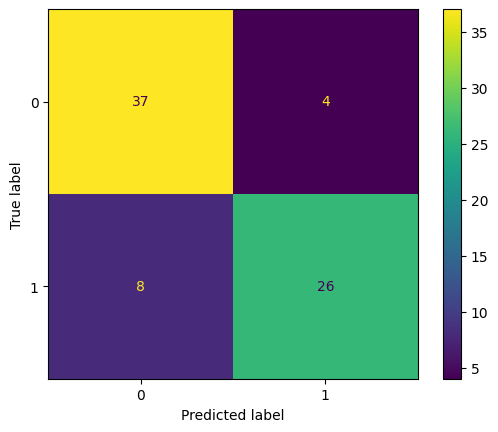

<Figure size 800x600 with 0 Axes>

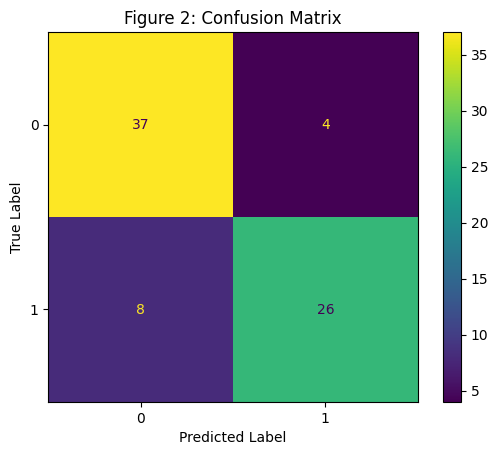

In [35]:
disp = ConfusionMatrixDisplay.from_estimator(cleveland_fit, X_test, y_test)

plt.figure(figsize=(8, 6)) 
disp.plot()
plt.title('Figure 2: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# plt.show()

In [22]:
y_true = cleveland_test_predictions['heart_disease_presence']
y_pred = cleveland_test_predictions['predicted']

#### Precision and Recall

Finally, we were able to determine the precision and recall of our classifier.

In [23]:
precision = precision_score(y_true, y_pred)
precision

0.8666666666666667

In [24]:
recall = recall_score(y_true, y_pred)
recall

0.7647058823529411

## Discussion:

The goal of our project was to build an accurate classification model to predict the presence of heart disease or not based on available predictor variables. 
We first decided to convert the response variable heart disease presence level 1-4 to 1 meaning presence, and level 0 remains as no presence of heart disease. Since our classifier is only detecting the presence of heart disease and not the stage of heart disease, changing all the positive values to 1 and keeping all zeros as 0 was effective enough to the purpose of this classifier. 
Using the selected 4 predictor variables (`trestbps`, `chol`, `thalach`, `oldpeak`) from the proposal after changing the levels 1-4 to 1 in the heart disease presence variable, we obtained a high false negative value, a recall of 50.0% and a precision of 85.7%. To decrease the false negative value for clinical purposes, we balanced the samples from level 0 with 124 data counts and level 1 with 103 data counts to both levels having 124 data counts. Through balancing the data, we increased the recall to 55.6%; however, precision was lowered to 69.0%. 
We then realized the difficulties in obtaining an ideal recall and lowering false positive cases may be due to the loss of information from dropping the categorical columns. The wrong assumption of the classification model should be trained mainly on quantitative data resulting in an inaccurate clinical model. By restoring all categorical columns (specified in the methods) and training the model on the balanced heart disease presence dataset, we obtained the final model with 84% accuracy, 86.7% precision and 76.5% recall, which outcompeted the models trained with only 4 predictor variables. As such, we were able to build a highly accurate classifier. The 2x2 confusion matrix provides a clear representation of four kinds of prediction that this classifier can make and as a disease classifier, a low false nagative errror rate, as indicated by the lower left box in the confusion matrix (Figure 2), is also an indicator of a well-established model.   

As mentioned previously, our goal is to have a classifier that can accurately predict whether or not a patient has heart disease. The current model is 84% accurate in predicting a randomly drewed testing set using K-nearest neighbours classifier with number of neighbours equals to 3 (n = 3). The 84% prediction accuracy was obtained from a 10 fold cross-validation and n = 3 was determined by plotting the accuracies versus number of K-neighbours and obtaining the number of K that returned the highest prediction accuracy. This is an ideal accuracy that we are expected to find with current ability. Also, a current recall of 76.5% is higher than previous models trained with 4 predictor variables which indicates an increase in ratio between the number of correct positive predictions and total number of positive test set observations. Therefore, an increase in recall represents a decrease in false negatives, which benefits this model’s clinical utility.
	
The development of an accurate classification model for predicting the presence of heart disease based on various predictor variables could have impacts on clinical diagnosis improvement, early intervention and variables selection. The classifier with an 84% accuracy can potentially assist healthcare professionals in diagnosing the presence of heart disease more effectively. The model’s ability to balance precision (86.7%) and recall (76.5%) is crucial in a clinical setting. High precision ensures that positive predictions are reliable, while a high recall can indicate proportion of actual positive cases, reducing the chances of false negatives. A reliable heart disease prediction model can contribute to early intervention with early diagnosis. This could lead to a reduction in the severity of heart-related diseases. The 13 predictor variables used in this model are selected to show a relationship with heart disease identification, so they are a guide to doctors when diagnosing a patient with heart disease.

Other impacts that our findings have on building clinical classifiers are consideration of categorial variables and trade-offs in precision and recall. The realization that including categorical variables in the model can improve its performance highlights the significance of considering various types of data in healthcare analytics. This insight could influence the design of future classification models for medical diagnoses. Two abandoned models demonstrate the trade-offs between precision and recall and how balancing the dataset can impact model performance. By balancing the dataset, the precision dropped from 85% to 69% while recall increased from 50% to 55%. It is important for healthcare analyticians to decide whether it’s more important to minimize false positives or false negatives based on the context of the medical application.
Since this classifier is 81% accurate, there is a great space for improvement, which could lead to further research, such as exploring additional predictor variables, investigating the generalizability of the model to different patient populations, and comparing with other existing classifiers. 


## References:

1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J.-J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology, 64(5), 304–310. https://doi.org/10.1016/0002-9149(89)90524-9
2. Canada, Public Health Agency of. “Government of Canada.” Canada.Ca, / Gouvernement du Canada, 28 July 2022, www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html.   
3. “Heart Disease.” UCI Machine Learning Repository, 1988, archive.ics.uci.edu/dataset/45/heart+disease.  
4. Parry, R M, et al. “K-nearest neighbor models for microarray gene expression analysis and clinical outcome prediction.” The Pharmacogenomics Journal, vol. 10, no. 4, 2010, pp. 292–309, https://doi.org/10.1038/tpj.2010.56. 
5. Tayeb, Shahab, et al. “Toward predicting medical conditions using K-nearest neighbors.” 2017 IEEE International Conference on Big Data (Big Data), 2017, https://doi.org/10.1109/bigdata.2017.8258395. 
